In [61]:
from pylab import *
import matplotlib
import matplotlib.gridspec as gridspec
%matplotlib inline

RDM=np.loadtxt("../RDM/M-vt-roff-fs.txt")
CSF=np.loadtxt("../CSF/M-vt-roff-fs.txt")
AGN=np.loadtxt("../AGN/M-vt-roff-fs.txt")

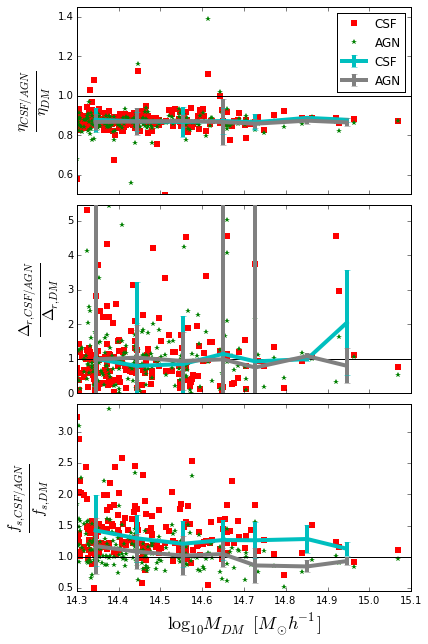

In [62]:
f1=figure(1,figsize=(6,9),dpi=250)
ax1=f1.add_subplot(3,1,1); ax2=f1.add_subplot(3,1,2); ax3=f1.add_subplot(3,1,3)

ax1.plot(RDM[:,0],CSF[:,1]/RDM[:,1],"rs",mec='none',label="CSF")
ax1.plot(RDM[:,0],AGN[:,1]/RDM[:,1],"g*",mec='none',label="AGN")

ax2.plot(RDM[:,0],CSF[:,2]/RDM[:,2],"rs",mec='none',label="CSF")
ax2.plot(RDM[:,0],AGN[:,2]/RDM[:,2],"g*",mec='none',label="AGN")

ax3.plot(RDM[:,0],CSF[:,3]/RDM[:,3],"rs",mec='none',label="CSF")
ax3.plot(RDM[:,0],AGN[:,3]/RDM[:,3],"g*",mec='none',label="AGN")

idsdm=np.argsort(RDM[:,0])
RDM=RDM[idsdm]; CSF=CSF[idsdm]; AGN=AGN[idsdm]
CSF/=RDM; AGN/=RDM
dmmd=np.zeros(7); csfmd=np.zeros((7,3,2));agnmd=np.zeros((7,3,2))
n=0
# for i in np.arange(0,184,23):
#     dmmd[n]     =np.median(RDM[i:i+23,0])
#     csfmd[n,0,0]=np.median(CSF[i:i+23,1]);csfmd[n,0,1]=np.std(CSF[i:i+23,1])
#     csfmd[n,1,0]=np.median(CSF[i:i+23,2]);csfmd[n,1,1]=np.std(CSF[i:i+23,2])
#     csfmd[n,2,0]=np.median(CSF[i:i+23,3]);csfmd[n,2,1]=np.std(CSF[i:i+23,3])
#     agnmd[n,0,0]=np.median(AGN[i:i+23,1]);agnmd[n,0,1]=np.std(AGN[i:i+23,1])
#     agnmd[n,1,0]=np.median(AGN[i:i+23,2]);agnmd[n,1,1]=np.std(AGN[i:i+23,2])
#     agnmd[n,2,0]=np.median(AGN[i:i+23,3]);agnmd[n,2,1]=np.std(AGN[i:i+23,3])
#     n+=1
mb=np.arange(14.3,15.2,0.1)
mb=np.delete(mb,-2)
for i,m in enumerate(mb[:-1]):
    ids=np.where((RDM<mb[i+1]) & (RDM>=m))[0]
    dmmd[n]     =np.median(RDM[ids,0])
    csfmd[n,0,0]=np.median(CSF[ids,1]); csfmd[n,0,1]=np.std(CSF[ids,1])
    csfmd[n,1,0]=np.median(CSF[ids,2]); csfmd[n,1,1]=np.std(CSF[ids,2])
    csfmd[n,2,0]=np.median(CSF[ids,3]); csfmd[n,2,1]=np.std(CSF[ids,3])
    agnmd[n,0,0]=np.median(AGN[ids,1]); agnmd[n,0,1]=np.std(AGN[ids,1])
    agnmd[n,1,0]=np.median(AGN[ids,2]); agnmd[n,1,1]=np.std(AGN[ids,2])
    agnmd[n,2,0]=np.median(AGN[ids,3]); agnmd[n,2,1]=np.std(AGN[ids,3])
    n+=1
ax1.errorbar(dmmd,csfmd[:,0,0],yerr=csfmd[:,0,1],c='c',ls='-',lw=4,zorder=9,label="CSF")
ax1.errorbar(dmmd,agnmd[:,0,0],yerr=agnmd[:,0,1],color='0.5',ls='-',lw=4,zorder=9,label="AGN")
ax2.errorbar(dmmd,csfmd[:,1,0],yerr=csfmd[:,1,1],color='c',ls='-',lw=4,zorder=9,label="CSF")
ax2.errorbar(dmmd,agnmd[:,1,0],yerr=agnmd[:,1,1],color='0.5',ls='-',lw=4,zorder=9,label="AGN")
ax3.errorbar(dmmd,csfmd[:,2,0],yerr=csfmd[:,2,1],color='c',ls='-',lw=4,zorder=9,label="CSF")
ax3.errorbar(dmmd,agnmd[:,2,0],yerr=agnmd[:,2,1],color='0.5',ls='-',lw=4,zorder=9,label="AGN")

setp([aa.get_xticklabels() for aa in [ax1,ax2]], visible=False)
[aa.plot([14.3,15.1],[1,1],'k-') for aa in [ax1,ax2, ax3]]
ax1.legend(numpoints=1)
ax3.set_xlabel(r"$\log_{10} M_{DM} \ \ [M_{\odot} h^{-1}]$", fontsize=18)
ax1.set_ylabel(r"$\frac{\eta_{CSF/AGN}}{\eta_{DM}}$", fontsize=22)
ax2.set_ylabel(r"$\frac{\Delta_{r, CSF/AGN}}{\Delta_{r, DM}}$", fontsize=22)
ax3.set_ylabel(r"$\frac{f_{s, CSF/AGN}}{f_{s, DM}}$", fontsize=22)
ax1.set_ylim(0.5,1.45); ax2.set_ylim(0.01,5.45); ax3.set_ylim(0.45,3.45); 
tight_layout()
f1.savefig("plots/Baryon-effect.eps")

In [63]:
print mb, i

[ 14.3  14.4  14.5  14.6  14.7  14.8  14.9  15.1] 6
